In [2]:
pip install yfinance


     -------------------------------------- 73.5/73.5 kB 452.1 kB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB ? eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 1.3 MB/s eta 0:00:00
     ------------------------------------ 505.5/505.5 kB 856.8 kB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138938 sha256=3810dfa3c0483d29dd09bdc40961629118fb91372b2ea71a0cbdcd2d1023c73b
  Stored in directory: c:\users\vittal\appdata\local\pip\cache\wheels\3e\23\b4\7729b2d48a34ee9d95c11f7f8dfd4ff0571a056e2691118b

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [3]:
import yfinance as yf
ticker = 'TSLA'
tesla_data = yf.download(ticker)
tesla_data_reset = tesla_data.reset_index()
print(tesla_data_reset.head())
tesla_data_reset.to_csv('tesla_data.csv', index=True)

[*********************100%%**********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "html.parser")
table = soup.find_all('table')[1] 
rows = table.find_all('tr')
headers = ["Date", "Tesla Quarterly Revenue(Millions of US $)"]
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    # Skip rows that don't have enough data
    if len(cols) == 2:
        data.append([col.text.strip() for col in cols])
tesla_revenue = pd.DataFrame(data, columns=headers)
print(tesla_revenue.tail())

          Date Tesla Quarterly Revenue(Millions of US $)
49  2010-06-30                                       $28
50  2010-03-31                                       $21
51  2009-12-31                                          
52  2009-09-30                                       $46
53  2009-06-30                                       $27


In [5]:
import yfinance as yf
import pandas as pd
ticker = "GME"
gme_data = yf.download(ticker, start="2020-01-01", end="2023-12-31")
print(gme_data.tail())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-12-22  16.780001  17.200001  16.450001  16.969999  16.969999  3325100
2023-12-26  16.980000  17.410000  16.820000  17.360001  17.360001  3079600
2023-12-27  17.430000  18.370001  17.370001  18.370001  18.370001  4800100
2023-12-28  18.049999  18.320000  17.850000  18.070000  18.070000  3574800
2023-12-29  18.040001  18.160000  17.459999  17.530001  17.530001  4524200


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find_all('table')[0]  
rows = table.find_all('tr')
headers = ["Date", "gamestop Quarterly Revenue(Millions of US $)"]
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])
gme_revenue = pd.DataFrame(data, columns=headers)
print(gme_revenue)

    Date gamestop Quarterly Revenue(Millions of US $)
0   2020                                       $6,466
1   2019                                       $8,285
2   2018                                       $8,547
3   2017                                       $7,965
4   2016                                       $9,364
5   2015                                       $9,296
6   2014                                       $9,040
7   2013                                       $8,887
8   2012                                       $9,551
9   2011                                       $9,474
10  2010                                       $9,078
11  2009                                       $8,806
12  2008                                       $7,094
13  2007                                       $5,319
14  2006                                       $3,092
15  2005                                       $1,843


[*********************100%%**********************]  1 of 1 completed


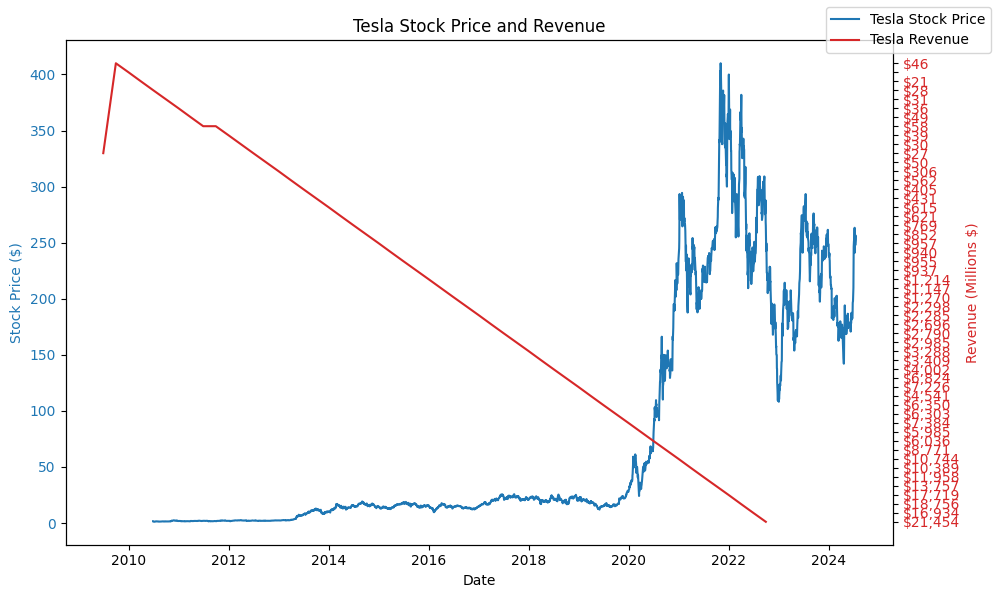

In [9]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
ticker = 'TSLA'
tesla_data = yf.download(ticker)
tesla_data_reset = tesla_data.reset_index()
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "html.parser")
table = soup.find_all('table')[1]  
rows = table.find_all('tr')
headers = ["Date", "Tesla Quarterly Revenue(Millions of US $)"]
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 2:
        data.append([col.text.strip() for col in cols])
tesla_revenue = pd.DataFrame(data, columns=headers)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(tesla_data_reset['Date'], tesla_data_reset['Close'], color='tab:blue', label='Tesla Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'], color='tab:red', label='Tesla Revenue')
ax2.set_ylabel('Revenue (Millions $)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('Tesla Stock Price and Revenue')
fig.tight_layout()
fig.legend(loc="upper right")
plt.show()